<a href="https://colab.research.google.com/github/UCLM-ESI-NECULA/DataMining/blob/master/datasetCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nuova sezione

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf sample_data/

In [ ]:
import numpy as np
import pandas as pd
import os
import re
from matplotlib import pyplot as plt
import seaborn as sns
DS1  = 'DS1-DatosConsumoAlimentario.txt'
DS2  = 'DS2-PreciosSemanales.txt'
DS3  = 'DS3-ProductData.txt'
DS3A = 'DS3A-DatosMercaMadrid.txt'
DS3B = 'DS3B-DatosMercaBarna.txt'
DS4  = 'DS4-ComercioExterior.txt'
DS5  = 'DS5-CoronavirusCases.txt'
DS6  = 'DS6-owid-covid-data.csv'


DS3Transformed = 'DS3-Transformed'

# Directory path
dir_path = '/content/drive/MyDrive/Scuola/UCLM/Colab Notebooks/Datasets/'

cleaned_path = '/content/drive/MyDrive/Scuola/UCLM/Colab Notebooks/Datasets/Datacard/Clean/'

#DS1

In [ ]:
#Read dataset
df = pd.read_csv(dir_path + DS1, sep='|',decimal=',')

In this Dataset we have separate data for all CCAA of Spain, and 1 more category which is Total.Since we have already the total we can eliminate the others but firstly we need to check if the Total is sum/average of the other CCAAs.

In [ ]:
#this block of code helps us to compare the datas between other CCAAs and the total Nacionales
for x in range(2018,2021):
    for y in range(1,13):
        # Step 1: Sum Volumen and Valor excluding Total Nacional for the month 1, grouped by Producto
        sum_volumen_by_producto = df[(df['CCAA'] != 'Total Nacional') & (df['Mes'] == y) &(df['Año']==x)].groupby('Producto')['Volumen (miles de kg)'].sum()
        sum_valor_by_producto = df[(df['CCAA'] != 'Total Nacional') & (df['Mes'] == y)&(df['Año']==x)].groupby('Producto')['Valor (miles de €)'].sum()
        # Step 2: Calculate the average of Precio Medio excluding Total Nacional for the month 1, grouped by Producto
        avg_precio_medio_by_producto = df[(df['CCAA'] != 'Total Nacional') & (df['Mes'] == y)&(df['Año']==x)].groupby('Producto')['Precio medio kg'].mean()
        sum_volumen_by_producto = df[(df['CCAA'] != 'Total Nacional') & (df['Mes'] == y) &(df['Año']==x)].groupby('Producto')['Volumen (miles de kg)'].sum()
        # Step 3: Compare with Total Nacional values for the month 1, grouped by Producto
        total_nacional_values_by_producto = df[(df['CCAA'] == 'Total Nacional') & (df['Mes'] == y)&(df['Año']==x)].groupby('Producto').agg({
            'Volumen (miles de kg)': 'first',
            'Valor (miles de €)': 'first',
            'Precio medio kg': 'first'
        })
        print(f"Sum of Volumen of the year:{x}and the month:{y}(excluding Total Nacional) grouped by Producto:")
        print(sum_volumen_by_producto)
        print(f"\nSum of Valor of the year:{x}and the month:{y}(excluding Total Nacional) grouped by Producto:")
        print(sum_valor_by_producto)
        print(f"\nAverage Precio Medio of the year:{x}and the month:{y}(excluding Total Nacional) grouped by Producto:")
        print(avg_precio_medio_by_producto)
        # Compare with Total Nacional values grouped by Producto
        print(f"\nTotal Nacional values of the year:{x}and the month:{y} grouped by Producto:")
        print(total_nacional_values_by_producto)

So after checking we saw that Total Nacional datas are calculated correctly and since after 2020 june we just have the Total Nacional datas we can dropp the other CCAAs and save it

In [ ]:
df_tn = df[df['CCAA'] == 'Total Nacional'].copy()

In this dataset, datas are not sorted and so we sorted it for data analyzing

In [ ]:
#enumarate the months
df_tn['Mes'] = df_tn['Mes'].map({'Enero':1, 'Febrero':2, 'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9,'Octubre':10,'Noviembre':11,'Diciembre':12})
df_tn.sort_values(by=['Año','Mes','CCAA'])

print(df['CCAA'].value_counts())
print(df[df['Año']==2020]['CCAA'].value_counts())
#After 2020 junio we have just the total national datas thats why some  months have higher frequency.last 120 rows are just total national

For creating the data card, some of the products name has to be changed (we will compare the products from DS1 and DS2 and add labels to DS1)

In [ ]:
df_tn['Producto'] = df_tn['Producto'].replace('MELON', 'MELONES')
df_tn['Producto'] = df_tn['Producto'].replace('CHAMPIÑONES+O.SETAS','CHAMPIÑONES')
df_tn['Producto'] = df_tn['Producto'].replace('FRESAS/FRESON', 'FRESONES')
df_tn['Producto'] = df_tn['Producto'].replace('LECHUGA/ESC./ENDIVIA', 'LECHUGAS')
df_tn['Producto'] = df_tn['Producto'].replace('MANGO', 'MANGOS')
df_tn['Producto'] = df_tn['Producto'].replace('PIÑA', 'PIÑAS')
df_tn['Producto'] = df_tn['Producto'].replace('PUERRO', 'PUERROS')
df_tn['Producto'] = df_tn['Producto'].replace('SANDIA', 'SANDIAS')
df_tn['Producto'] = df_tn['Producto'].replace('CHIRIMOYA', 'CHIRIMOYAS')

In [ ]:
# Remove the empty columns
print(df_tn.isnull().sum()) #checking if I  have empty values there are 2 empty columns and 120 rows without penetration
df_tn.drop(['Penetración (%)','Unnamed: 10', 'Unnamed: 11','CCAA'], axis=1, inplace=True)

In [ ]:
df_tn['Producto'].unique()
df_tn.rename(columns={'Producto': 'product', 'Mes': 'MONTH', 'Año': 'YEAR','Volumen (miles de kg)':'Volumen'}, inplace=True)
#Saving the cleaned dataset
df_tn.to_csv(cleaned_path + 'Cleaned_' + DS1, sep='|', index=False)

#DS2

In [ ]:
# Read the data from the TXT file into a DataFrame
df = pd.read_csv(dir_path + DS2, sep='|', usecols=['INICIO','FIN','SUBSECTOR','PRODUCTO','TIPO', 'SUBTIPO','PRECIO'])

df.head()

#Dropping all rows that contain 'nan'
df = df.dropna(subset=['PRODUCTO'])

In [ ]:
#TIPO', 'SUBTIPO'
unique_tipo = df['TIPO'].unique()
unique_subtipo = df['SUBTIPO'].unique()
unique_tipo, unique_subtipo

In [ ]:
# Converting the 'PRECIO' column to a numeric format for price comparison
# Replacing the comma in the price string with a dot for correct conversion
df['PRECIO'] = df['PRECIO'].str.replace(',', '.').astype(float)

# Identifying eco and non-eco products
# Eco products have '(ECO)' in their 'TIPO' or 'SUBTIPO'
is_eco = df['PRODUCTO'].str.contains('\(ECO\)', na=False)

# Separating the DataFrame into eco and non-eco products
df_eco = df[is_eco]
df_non_eco = df[~is_eco]

print(df_eco['PRODUCTO'].unique())
print(df_non_eco['PRODUCTO'].unique())

# Calculating the average prices for both eco and non-eco products
average_price_eco = df_eco.groupby(['PRODUCTO'])['PRECIO'].mean()
average_price_non_eco = df_non_eco.groupby(['PRODUCTO'])['PRECIO'].mean()

# Creating a DataFrame to compare the prices
price_comparison = pd.DataFrame({
    'Average Price Eco': average_price_eco,
    'Average Price Non-Eco': average_price_non_eco
}).reset_index()

price_comparison

['BERENJENA (ECO)' 'CALABACIN (ECO)' 'PEPINO (ECO)' 'PIMIENTO (ECO)'
 'TOMATE (ECO)' 'SANDIA (ECO)' 'JUDIA VERDE (ECO)' 'ALMENDRA (ECO)']
['LIMON' 'MANDARINA' 'NARANJA' 'POMELO' 'AGUACATE' 'CHIRIMOYA' 'MANGO'
 'FRAMBUESA' 'FRESÓN' 'AJO' 'CEBOLLA' 'ESPARRAGO' 'LECHUGA' 'ZANAHORIA'
 'BERENJENA' 'CALABACIN' 'JUDIA VERDE' 'MELON' 'PEPINO' 'PIMIENTO'
 'SANDIA' 'TOMATE' 'ALMENDRA' 'ARANDANO']


,PRODUCTO,Average Price Eco,Average Price Non-Eco
0,AGUACATE,NaN,1.707550
1,AJO,NaN,1.766453
2,ALMENDRA,NaN,5.304009
3,ALMENDRA (ECO),8.770370,NaN
4,ARANDANO,NaN,5.433768
5,BERENJENA,NaN,0.643852
6,BERENJENA (ECO),0.776273,NaN
7,CALABACIN,NaN,0.534605
8,CALABACIN (ECO),0.797455,NaN
9,CEBOLLA,NaN,0.452500


In [ ]:
#Handling the dates
df['INICIO'] = pd.to_datetime(df['INICIO'], format='%d/%m/%Y')
df['FIN'] = pd.to_datetime(df['FIN'], format='%d/%m/%Y')
df['Year'] = df['INICIO'].dt.year
df['Month_INICIO'] = df['INICIO'].dt.month
df['Month_FIN'] = df['FIN'].dt.month


#Ordering the df product by product according to the unique products list
df = df.sort_values('PRODUCTO')

#Reseting index after sorting
df.reset_index(drop=True, inplace=True)

#Redordering the dataframe
df = df.reindex(columns=['Year','Month_INICIO','Month_FIN','SECTOR','SUBSECTOR','PRODUCTO','PRECIO'])
df = df.sort_values(by=['Year','Month_INICIO','Month_FIN','PRODUCTO'])

df.head()

df.to_csv(cleaned_path + 'Cleaned_' + DS2, sep='|', index=False)

#DS3

For the third Dataset we had to do something different, we had to merge them.



*   First we removed the **Unidad** column, which had a constant value of 'KG'
*   Then we Unified the **Familia** column, because we didn't needed the specific family category

*   We unified the column **Familia** in order to have 2 big categories, Fruits, and Vegetables. We kept the 'Other' and 'Seta' categories, even if our statements are not regarding them.







In [ ]:
# Removing the column 'price_min' 'price_max' from dataset A
# Removing Unidad from both because is not needed, is only KG,
df1 = pd.read_csv(dir_path + DS3A, sep='|', usecols=['product', 'familia', 'YEAR', 'MONTH', 'price_mean', 'Volumen'])
df2 = pd.read_csv(dir_path + DS3B, sep='|', usecols=['product', 'familia', 'YEAR', 'MONTH', 'price_mean', 'Volumen'])


In [ ]:
# Function to correct misinterpreted UTF-8 encoded text
def normalize_text(text):
    if isinstance(text, str):
        try:
            return text.encode('iso-8859-1').decode('utf-8')
        except UnicodeDecodeError:
            # In case of decode error, return the original text
            return text
    return text

# Apply the function to all the data in both dataframes
df1 = df1.applymap(normalize_text)
df2 = df2.applymap(normalize_text)

In [ ]:
# Define a patterns
pattern_frutas = re.compile(r'^FRUTAS.*')
pattern_hortalizas = re.compile(r'^HORTALIZAS.*')

for df in [df1, df2]:
    # Replace 'ULTRAMARINO' with 'FRUTAS'
    df['familia'] = df['familia'].replace('ULTRAMARINO', 'FRUTAS')

    # Replace 'OTROS OTROS' with 'OTROS'
    df['familia'] = df['familia'].replace('OTROS OTROS', 'OTROS')

    # Replace 'OTROS SETA' with 'SETA'
    df['familia'] = df['familia'].replace('OTROS SETA', 'SETA')

    # Replace 'PATATAS' with 'HORTALIZAS'
    df['familia'] = df['familia'].replace('PATATAS', 'HORTALIZAS')

    # Replace 'FRUTAS ...' with 'FRUTAS'
    df['familia'] = df['familia'].replace(pattern_frutas, 'FRUTAS', regex=True)

    # Replace 'HORTALIZAS ...' with 'HORTALIZAS'
    df['familia'] = df['familia'].replace(pattern_hortalizas, 'HORTALIZAS', regex=True)

In [ ]:
# Merging the two datasets
merged_df = pd.concat([df1, df2])
merged_df['product'] = merged_df['product'].apply(lambda x: x[:-1] if x.endswith('S') else x)

In [ ]:
# Replacing comma in numbers with dot for proper numeric conversion
merged_df['price_mean'] = merged_df['price_mean'].str.replace(',', '.').astype(float)

# Grouping by common columns and calculating the mean of 'price_mean', and the 'sum' of the volume
grouped_df = merged_df.groupby(['product', 'familia', 'YEAR', 'MONTH'], as_index=False) \
              .agg({'price_mean': 'mean', 'Volumen': 'sum'})

print(len(merged_df['product'].unique()))
grouped_df

223


,product,familia,YEAR,MONTH,price_mean,Volumen
0,ACEITUNA,FRUTAS,2018,1,3.014286,47512
1,ACEITUNA,FRUTAS,2018,2,3.027500,49940
2,ACEITUNA,FRUTAS,2018,3,3.545000,9940
3,ACEITUNA,FRUTAS,2018,4,3.182000,52638
4,ACEITUNA,FRUTAS,2018,5,3.557143,5239
...,...,...,...,...,...,...
6598,ÑAME O YAME,HORTALIZAS,2020,6,1.500000,5220
6599,ÑAME O YAME,HORTALIZAS,2020,8,1.500000,2340
6600,ÑAME O YAME,HORTALIZAS,2020,9,1.500000,4340
6601,ÑAME O YAME,HORTALIZAS,2020,10,1.500000,3564


Having constant values is not a good thing. Those products appears only once in this dataset

##Remove the outliers

I can't use the standard deviation because this is not a Normal Distribution, and it won't be a good option

In [ ]:
# Splitting the concatenated fields into separate columns
data_split = grouped_df
# Converting Year and Month to integers for proper sorting
data_split['YEAR'] = data_split['YEAR'].astype(int)
data_split['MONTH'] = data_split['MONTH'].astype(int)

# Creating a 'YearMonth' column for easier handling of date information
data_split['YearMonth'] = data_split['YEAR'].astype(str) + '-' + data_split['MONTH'].astype(str)

# Aggregating data to count the number of months each product appears in and list the months
product_month_data = data_split.groupby('product').agg(Count=('YearMonth', 'nunique'), Months=('YearMonth', lambda x: list(x.unique()))).reset_index()
product_month_data = product_month_data.sort_values(by=['Count'])

product_month_data


,product,Count,Months
11,BANANITO,1,[2018-9]
34,CAÑA DE AZUCAR,1,[2018-10]
13,BELLOTA,1,[2018-2]
139,MANGOSTAN,1,[2018-6]
182,PERETA,1,[2019-10]
...,...,...,...
89,FRUTAS MELÓN VERDE PIEL DE SAPO,35,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."
90,FRUTAS MORA,35,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."
91,FRUTAS PIÑA TROPICAL,35,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."
134,MANDARINA CLEMENTINA,35,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."


In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Count'}, axis=1)
              .sort_values('Count', ascending=True))
  xs = counted['Count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

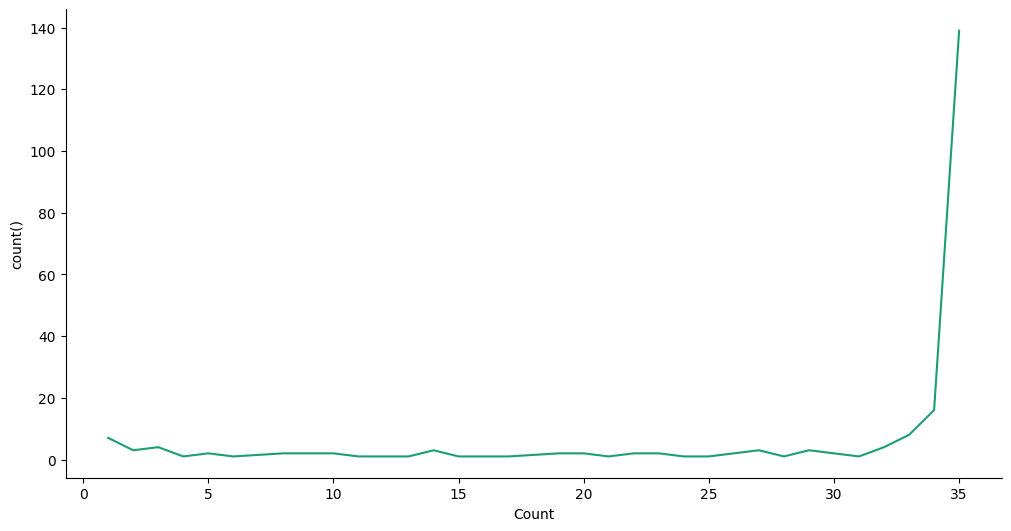

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = product_month_data.sort_values('Count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Count')
_ = plt.ylabel('count()')

In [ ]:
# Calculating the IQR for the 'Count' column
Q1 = product_month_data['Count'].quantile(0.25)
Q3 = product_month_data['Count'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as those outside of the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower_bound {lower_bound}')
print(f'upper_bound {upper_bound}')

# Filtering out outliers
data_no_outliers = product_month_data[(product_month_data['Count'] >= lower_bound) & (product_month_data['Count'] <= upper_bound)]
data_no_outliers

lower_bound 26.25
upper_bound 40.25


,product,Count,Months
104,GUINDILLA,27,"[2018-2, 2018-3, 2018-4, 2018-9, 2018-10, 2018..."
207,SECO CASTAÑA,27,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."
154,MEMBRILLO,27,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."
222,ÑAME O YAME,28,"[2018-1, 2018-3, 2018-7, 2018-8, 2018-9, 2018-..."
44,CHIRIMOYA,29,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."
...,...,...,...
89,FRUTAS MELÓN VERDE PIEL DE SAPO,35,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."
90,FRUTAS MORA,35,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."
91,FRUTAS PIÑA TROPICAL,35,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."
134,MANDARINA CLEMENTINA,35,"[2018-1, 2018-2, 2018-3, 2018-4, 2018-5, 2018-..."


In [ ]:
grouped_df = grouped_df[grouped_df['product'].isin(data_no_outliers['product'])]
grouped_df

,product,familia,YEAR,MONTH,price_mean,Volumen,YearMonth
0,ACEITUNA,FRUTAS,2018,1,3.014286,47512,2018-1
1,ACEITUNA,FRUTAS,2018,2,3.027500,49940,2018-2
2,ACEITUNA,FRUTAS,2018,3,3.545000,9940,2018-3
3,ACEITUNA,FRUTAS,2018,4,3.182000,52638,2018-4
4,ACEITUNA,FRUTAS,2018,5,3.557143,5239,2018-5
...,...,...,...,...,...,...,...
6598,ÑAME O YAME,HORTALIZAS,2020,6,1.500000,5220,2020-6
6599,ÑAME O YAME,HORTALIZAS,2020,8,1.500000,2340,2020-8
6600,ÑAME O YAME,HORTALIZAS,2020,9,1.500000,4340,2020-9
6601,ÑAME O YAME,HORTALIZAS,2020,10,1.500000,3564,2020-10


In [ ]:
grouped_df = grouped_df[grouped_df['familia'] != 'OTROS SETAS']

In [ ]:
constant_value_products = []
for product, group_data in grouped_df.groupby('product'):
    if group_data['price_mean'].nunique() == 1 :
        # Append product name, price_mean, and Volumen to the list
        constant_value_products.append({
            'product': product,
            'Constant Price Mean': group_data['price_mean'].iloc[0],
            'Constant Volumen': group_data['Volumen'].iloc[0]
        })

# Printing the products with constant price_mean and Volumen
for product_info in constant_value_products:
    print(f"{product_info['product']}: Price Mean = {product_info['Constant Price Mean']}, Volume = {product_info['Constant Volumen']}")

# Extracting product names from constant_value_products
prod_array = [product_info['product'] for product_info in constant_value_products]

# Filter the DataFrame
grouped_df = grouped_df[~grouped_df['product'].isin(prod_array)]

CONGELADOS VEGETALE: Price Mean = 0.0, Volume = 552050
CONSERVAS VEGETALE: Price Mean = 0.0, Volume = 153890
CUARTA GAMA HORT.: Price Mean = 0.0, Volume = 1116940
ELABORADOS VEGETALE: Price Mean = 0.0, Volume = 807870
FRUTAS MORA: Price Mean = 7.5, Volume = 10445
VARIO: Price Mean = 1.5, Volume = 446077


In [ ]:
grouped_df

,product,familia,YEAR,MONTH,price_mean,Volumen,YearMonth
0,ACEITUNA,FRUTAS,2018,1,3.014286,47512,2018-1
1,ACEITUNA,FRUTAS,2018,2,3.027500,49940,2018-2
2,ACEITUNA,FRUTAS,2018,3,3.545000,9940,2018-3
3,ACEITUNA,FRUTAS,2018,4,3.182000,52638,2018-4
4,ACEITUNA,FRUTAS,2018,5,3.557143,5239,2018-5
...,...,...,...,...,...,...,...
6598,ÑAME O YAME,HORTALIZAS,2020,6,1.500000,5220,2020-6
6599,ÑAME O YAME,HORTALIZAS,2020,8,1.500000,2340,2020-8
6600,ÑAME O YAME,HORTALIZAS,2020,9,1.500000,4340,2020-9
6601,ÑAME O YAME,HORTALIZAS,2020,10,1.500000,3564,2020-10


In [ ]:
# Save the DataFrame to CSV file
grouped_df.to_csv(cleaned_path + 'Cleaned_' + DS3, sep='|', index=False)

In [ ]:
null_values_df = grouped_df.isnull().any()
print("Null values in dfa:\n", null_values_df)

Null values in dfa:
 product       False
familia       False
YEAR          False
MONTH         False
price_mean    False
Volumen       False
YearMonth     False
dtype: bool


<ipython-input-95-ec0c9b8b9875>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn")


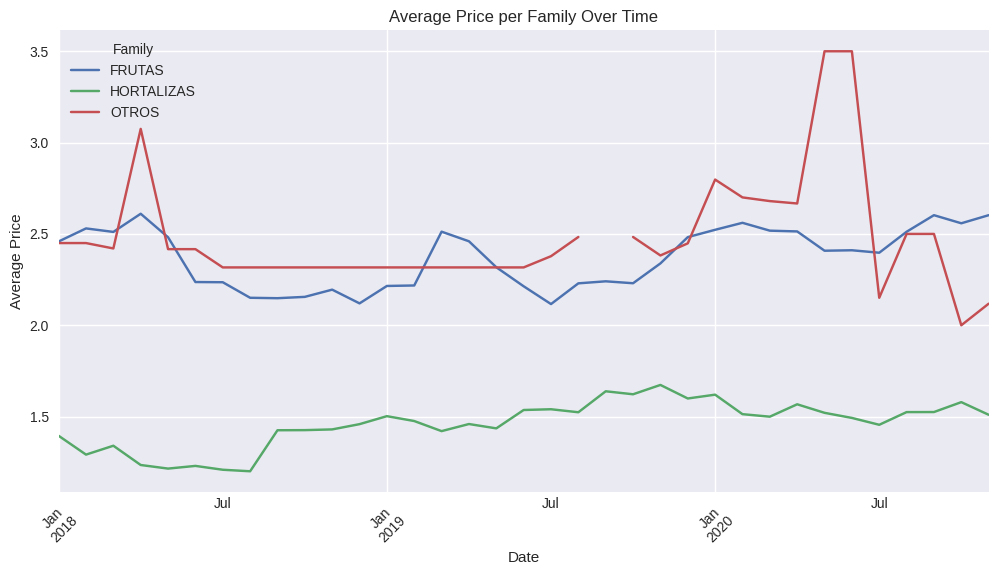

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.style.use("seaborn")

# Combine 'YEAR' and 'MONTH' into a single datetime column
grouped_df = grouped_df[grouped_df['familia'] != 'OTROS SETAS']

grouped_df['Date'] = pd.to_datetime(grouped_df['YEAR'].astype(str) + '-' + grouped_df['MONTH'].astype(str))

grouped_df.head()
# Calculating the mean price for each family over time
mean_price_per_family_time = grouped_df.groupby(['familia', 'Date'])['price_mean'].mean()

# Pivot the data for plotting
pivot_data = mean_price_per_family_time.reset_index().pivot(index='Date', columns='familia', values='price_mean')

# Plotting the mean price for each family over time
pivot_data.plot(kind='line', figsize=(12, 6))
plt.title("Average Price per Family Over Time")
plt.ylabel("Average Price")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title='Family')
plt.show()



#DS4

In [ ]:
df = pd.read_csv(dir_path + DS4, sep='|')

In [ ]:
df.drop('PARTNER', axis=1, inplace=True)
df.rename(columns={'Value': 'VALUE'}, inplace=True)

In [ ]:
# Grouping by the columns and counting the unique 'INDICATORS'
grouped = df.groupby(['PERIOD', 'REPORTER', 'PRODUCT', 'FLOW'])['INDICATORS'].nunique()
assert(all(grouped == 2))

In [ ]:
grouped.head()

PERIOD     REPORTER  PRODUCT                                        FLOW  
Apr. 2018  Austria   Bananas, fresh (excl. plantains)(2012-2500)    EXPORT    2
                                                                    IMPORT    2
                     Brussels sprouts, fresh or chilled(1988-2500)  EXPORT    2
                                                                    IMPORT    2
                     Cucumbers, fresh or chilled(1998-2500)         EXPORT    2
Name: INDICATORS, dtype: int64

In [ ]:
df['VALUE'] = df['VALUE'].replace(':', '0').str.replace(' ', '')
df['VALUE'] = pd.to_numeric(df['VALUE'])


In [ ]:
df = df.pivot_table(index=["PERIOD", "REPORTER", "PRODUCT", "FLOW"],
                          columns='INDICATORS',
                          values='VALUE',
                          aggfunc='first').reset_index()

# Rename columns
df.columns.name = None
df.columns = ['PERIOD', 'REPORTER', 'PRODUCT', 'FLOW', 'QUANTITY_IN_100KG', 'VALUE_IN_EUROS']


In [ ]:
df

In [ ]:
#Removing the useless information from reporter and product
df['REPORTER'] = df['REPORTER'].str.replace(r'\(.*\)', '', regex=True)
df['REPORTER'] = df['REPORTER'].str.split('-').str[0].str.strip()

In [ ]:
# Check if each combination of 'PERIOD', 'REPORTER', and 'PRODUCT' has both 'IMPORT' and 'EXPORT' flows
flow_check = df.groupby(['PERIOD', 'REPORTER', 'PRODUCT'])['FLOW'].unique()

missing_flows = flow_check[~flow_check.apply(lambda x: set(x) == {'IMPORT', 'EXPORT'})]

# Result
missing_flows


Series([], Name: FLOW, dtype: object)

In [ ]:
# Splitting the DataFrame into two based on the flow type
import_df = df[df['FLOW'] == 'IMPORT']
export_df = df[df['FLOW'] == 'EXPORT']

# Renaming columns to include the flow type as a prefix
import_df = import_df.rename(columns={'QUANTITY_IN_100KG': 'IMPORTED_QUANTITY_IN_100KG',
                                      'VALUE_IN_EUROS': 'IMPORTED_VALUE_IN_EUROS'})
export_df = export_df.rename(columns={'QUANTITY_IN_100KG': 'EXPORTED_QUANTITY_IN_100KG',
                                      'VALUE_IN_EUROS': 'EXPORTED_VALUE_IN_EUROS'})

# Dropping the 'FLOW' column as it's no longer needed
import_df = import_df.drop('FLOW', axis=1)
export_df = export_df.drop('FLOW', axis=1)

# Merging the two DataFrames
df = pd.merge(import_df, export_df, on=['PERIOD', 'REPORTER', 'PRODUCT'], how='outer')


In [ ]:
df

In [ ]:
# Counting the rows before the split
row_count_before_split = df.shape[0]
row_count_with_dash = df[df['PERIOD'].str.contains('-', na=False)].shape[0]
sum_EXPORTED_QUANTITY_IN_100KG_before_split = df['EXPORTED_QUANTITY_IN_100KG'].sum()
sum_EXPORTED_VALUE_IN_EUROS_before_split = df['EXPORTED_VALUE_IN_EUROS'].sum()
sum_IMPORTED_QUANTITY_IN_100KG_before_split = df['IMPORTED_QUANTITY_IN_100KG'].sum()
sum_IMPORTED_VALUE_IN_EUROS_before_split = df['IMPORTED_VALUE_IN_EUROS'].sum()


# Identifying rows with range periods (containing a dash)
ranged_mask = df['PERIOD'].str.contains('-')
ranged_periods = df['PERIOD'][ranged_mask].str.split('-', expand=True)
ranged_periods.columns = ['Start', 'End']
ranged_periods['Start_Year'] = ranged_periods['End'].str.strip().str.split(' ').str[-1]
ranged_periods['Start'] = ranged_periods['Start'].str.strip() + ' ' + ranged_periods['Start_Year']
ranged_periods['End'] = ranged_periods['End'].str.strip()

#Duplicate and update ranged rows
start_df = df[ranged_mask].copy()
end_df = df[ranged_mask].copy()
start_df['PERIOD'] = ranged_periods['Start']
end_df['PERIOD'] = ranged_periods['End']

#Adjust the quantities
cols_to_divide = ['EXPORTED_QUANTITY_IN_100KG', 'EXPORTED_VALUE_IN_EUROS', 'IMPORTED_QUANTITY_IN_100KG', 'IMPORTED_VALUE_IN_EUROS']
start_df[cols_to_divide] = start_df[cols_to_divide] / 2
end_df[cols_to_divide] = end_df[cols_to_divide] / 2

#Concatenate the results
df = pd.concat([df[~ranged_mask], start_df, end_df], ignore_index=True)

#Sort
df['PERIOD'] = pd.to_datetime(df['PERIOD'])
df = df.sort_values(by=['PERIOD', 'REPORTER', "PRODUCT"])

#Removing the useless information from reporter and product
df['REPORTER'] = df['REPORTER'].str.replace(r'\(.*\)', '', regex=True)
df['REPORTER'] = df['REPORTER'].str.split('-').str[0].str.strip()

#ASSERTION
# Counting the rows after the split
row_count_after_split = df.shape[0]

 # Summing across all specified columns and then the total
sum_EXPORTED_QUANTITY_IN_100KG_after_split = df['EXPORTED_QUANTITY_IN_100KG'].sum()
sum_EXPORTED_VALUE_IN_EUROS_after_split = df['EXPORTED_VALUE_IN_EUROS'].sum()
sum_IMPORTED_QUANTITY_IN_100KG_after_split = df['IMPORTED_QUANTITY_IN_100KG'].sum()
sum_IMPORTED_VALUE_IN_EUROS_after_split = df['IMPORTED_VALUE_IN_EUROS'].sum()

#Ensure no difference between the original data and the changed one
assert(row_count_before_split + row_count_with_dash == row_count_after_split)
assert(sum_EXPORTED_QUANTITY_IN_100KG_after_split == sum_EXPORTED_QUANTITY_IN_100KG_before_split)
assert(sum_EXPORTED_VALUE_IN_EUROS_after_split == sum_EXPORTED_VALUE_IN_EUROS_before_split)
assert(sum_IMPORTED_QUANTITY_IN_100KG_after_split == sum_IMPORTED_QUANTITY_IN_100KG_before_split)
assert(sum_IMPORTED_VALUE_IN_EUROS_after_split == sum_IMPORTED_VALUE_IN_EUROS_before_split)

# Checking if there are any NaN values
assert(df.isnull().values.any()==False)


In [ ]:
df

In [ ]:

# Match and remove content in parentheses
df['PRODUCT'] = df['PRODUCT'].apply(lambda x: re.sub(r"\(.*?\)", "", x).strip())
df['PRODUCT'] = df['PRODUCT'].str.replace("Fresh or chilled ", "", regex=False)
df['PRODUCT'] = df['PRODUCT'].str.replace("Fresh or dried ", "", regex=False)
df['PRODUCT'] = df['PRODUCT'].str.replace("Fresh ", "", regex=False)
df['PRODUCT'] = df['PRODUCT'].apply(lambda x: x.split(',')[0].strip())
df['PRODUCT'] = df['PRODUCT'].apply(lambda x: x.split('|')[0].strip())
df['PRODUCT'] = df['PRODUCT'].apply(lambda x: x.split('"')[0].strip())

df['PRODUCT'].unique()

array(['Bananas', 'Brussels sprouts', 'Cucumbers', 'Currants',
       'Dried apples', 'Dried apricots', 'Dried grapes', 'Dried pawpaws',
       'Dried peaches', 'Dried pears', 'Dried prunes', 'apples',
       'apricots', 'blackberries', 'blackcurrants', 'cherries', 'durians',
       'figs', 'grapes', 'kiwifruit', 'melons', 'navel oranges',
       'nectarines', 'asparagus', 'aubergines', 'beans',
       'cabbage lettuce', 'capers', 'carrots and turnips',
       'cauliflowers and headed broccoli', 'celery', 'chanterelles',
       'chicory', 'courgettes', 'edible mushrooms', 'fennel',
       'flap mushrooms', 'fruits of genus Capsicum or Pimenta',
       'gherkins', 'globe artichokes', 'leguminous vegetables', 'lettuce',
       'mushrooms of the genus', 'new potatoes from 1 January to 30 June',
       'olives', 'olives for oil production', 'peas', 'spinach',
       'sweet peppers', 'sweetcorn', 'truffles', 'witloof chicory',
       'avocados', 'citrus fruit', 'clementines incl. monreales'

In [ ]:
# Splitting the concatenated fields into separate columns
data_split = df

# Aggregating data to count the number of months each product appears in and list the months
product_month_data = data_split.groupby('PRODUCT').agg(Count=('PERIOD', 'nunique'), Months=('PERIOD', lambda x: list(x.unique()))).reset_index()
product_month_data = product_month_data.sort_values(by=['Count'])

product_month_data
product_month_data.to_csv(cleaned_path + 'Cleaned_' + DS4, sep='|', index=False)


#DS5

We processed both of the datasets we provided for coronavirus. We saw that the first one didn't have enough data for us so we'll only use the "owid-covid-data.csv".

In [ ]:
#Read dataset
df = pd.read_csv(dir_path+DS5, sep='|')
df.head()

#Create a new df for Spain
df_spain = df[df["countriesAndTerritories"]=='Spain']
df_spain.head()

# Summing up the cases of the same month
df_spain['dateRep'] = pd.to_datetime(df_spain['dateRep'], format='%d/%m/%Y')
df_spain['month'] = df_spain['dateRep'].dt.month
df_spain['year'] = df_spain['dateRep'].dt.year

cleaned_ds5 = df_spain.groupby(['year','month'])['cases'].sum().reset_index()

print(cleaned_ds5)

#DS6

##DS6 Weekly

In [ ]:
#Reading the dataset (owid)
df = pd.read_csv(dir_path+DS6)

#Creating a new dataset for Spain
df_spain = df[df["location"]=='Spain']
df_spain.head()
df_spain = df_spain[['date','total_cases', 'new_cases']]

# Converting the 'date' column to datetime format
df_spain['date'] = pd.to_datetime(df_spain['date'])

# Extracting year, month and week from the 'date' column
df_spain['year'] = df_spain['date'].dt.year
df_spain['month'] = df_spain['date'].dt.month
df_spain['week'] = df_spain['date'].dt.isocalendar().week

# Grouping
monthly_aggregated_data = df_spain.groupby(['year', 'month']).agg({
    'new_cases': 'sum',
    'total_cases': 'last'
}).reset_index()


weekly_aggregated_data = df_spain.groupby(['year', 'week']).agg({
    'new_cases': 'sum',
    'total_cases': 'last'
}).reset_index()

weekly_aggregated_data.to_csv(dir_path + DS6 + '_Spain_Weekly', sep='|', index=False)
monthly_aggregated_data.to_csv(dir_path + DS6 + '_Spain_Monthly', sep='|', index=False)
monthly_aggregated_data.to_csv(cleaned_path + 'Cleaned_' + DS6, sep='|', index=False)
df_spain

,date,total_cases,new_cases,year,month,week
302195,2020-01-03,NaN,0.0,2020,1,1
302196,2020-01-04,NaN,0.0,2020,1,1
302197,2020-01-05,NaN,0.0,2020,1,1
302198,2020-01-06,NaN,0.0,2020,1,2
302199,2020-01-07,NaN,0.0,2020,1,2
...,...,...,...,...,...,...
303610,2023-11-18,13980340.0,0.0,2023,11,46
303611,2023-11-19,13980340.0,0.0,2023,11,46
303612,2023-11-20,13980340.0,0.0,2023,11,47
303613,2023-11-21,13980340.0,0.0,2023,11,47


In [ ]:
#Reading the dataset (owid)
df = pd.read_csv(dir_path+DS6)

#Creating a new dataset for Spain
df_spain = df[df["location"]=='Spain']
df_spain.head()
df_spain = df_spain[['date','total_cases']]

#Replacing NaN values to 0
df_spain.fillna(0, inplace=True)

#Handling the dates
df_spain['date'] = pd.to_datetime(df_spain['date'], format='%Y/%m/%d')
df_spain['month'] = df_spain['date'].dt.month
df_spain['year'] = df_spain['date'].dt.year

#Accessing the last day of the month to reach the total_cases and putting them into a dataframe and ordering the dataframe
last_day_of_month = df_spain.groupby(['year', 'month'])['date'].max().reset_index()
last_day_cases = pd.merge(last_day_of_month, df_spain, on=['year', 'month', 'date'], how='left')[['year', 'month', 'total_cases']]
last_df= last_day_cases.groupby(['year', 'month'])['total_cases'].sum().reset_index()

last_df.head()

last_df.to_csv(cleaned_path + 'Cleaned_' + DS6, sep='|', index=False)
